# Importing Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [47]:
df=pd.read_csv('/content/dtw_results.csv')

# Creating extra features like mean and standard **deviation**

In [48]:

# Convert string representation of lists to actual lists
df['Sequence_Ay'] = df['Sequence_Ay'].apply(lambda x: ast.literal_eval(x))
df['Sequence_GyroZ'] = df['Sequence_GyroZ'].apply(lambda x: ast.literal_eval(x))

# Calculating the mean of Sequence_Ay and Sequence_GyroZ
df['Mean_Sequence_Ay'] = df['Sequence_Ay'].apply(lambda x: sum(x) / len(x))
df['Mean_Sequence_GyroZ'] = df['Sequence_GyroZ'].apply(lambda x: sum(x) / len(x))

# Calculating the standard deviation of Sequence_Ay and Sequence_GyroZ
df['Std_Sequence_Ay'] = df['Sequence_Ay'].apply(lambda x: pd.Series(x).std())
df['Std_Sequence_GyroZ'] = df['Sequence_GyroZ'].apply(lambda x: pd.Series(x).std())

# Show the updated DataFrame
print(df.head())

   Class Class_String                                        Sequence_Ay  \
0      0   zero-event  [0.3970875336956283, 0.38134619337728287, 0.37...   
1      0   zero-event  [0.3896312683832114, 0.40349583016828267, 0.40...   
2      0   zero-event  [0.3843114706864912, 0.3938731718619613, 0.378...   
3      0   zero-event  [0.38867042494863807, 0.390336053111909, 0.374...   
4      0   zero-event  [0.3437062953906295, 0.35132182000313067, 0.36...   

                                      Sequence_GyroZ   DTW_Ay_1   DTW_Ay_2  \
0  [0.42465424137129526, 0.4238252449059724, 0.42...  12.986127  10.243239   
1  [0.42373770760859325, 0.42325161853362675, 0.4...  13.492777  10.448514   
2  [0.43969975464518624, 0.4378641182779758, 0.43...  14.044310  10.356561   
3  [0.4360323840252456, 0.43461437541759723, 0.43...  13.140338  10.719822   
4  [0.42229253012045614, 0.423503578836461, 0.423...  17.081353  10.076356   

   DTW_Ay_3   DTW_Ay_4   DTW_Ay_5  DTW_GyroZ_1  DTW_GyroZ_2  DTW_GyroZ_3  

In [49]:
df.head()

,Class,Class_String,Sequence_Ay,Sequence_GyroZ,DTW_Ay_1,DTW_Ay_2,DTW_Ay_3,DTW_Ay_4,DTW_Ay_5,DTW_GyroZ_1,DTW_GyroZ_2,DTW_GyroZ_3,DTW_GyroZ_4,DTW_GyroZ_5,Mean_Sequence_Ay,Mean_Sequence_GyroZ,Std_Sequence_Ay,Std_Sequence_GyroZ
0,0,zero-event,"[0.3970875336956283, 0.38134619337728287, 0.37...","[0.42465424137129526, 0.4238252449059724, 0.42...",12.986127,10.243239,3.619330,6.792875,23.794396,21.841908,14.653150,14.329284,8.945111,22.600070,0.393187,0.423824,0.012290,0.000921
1,0,zero-event,"[0.3896312683832114, 0.40349583016828267, 0.40...","[0.42373770760859325, 0.42325161853362675, 0.4...",13.492777,10.448514,4.170315,6.883662,24.677211,22.016889,14.777375,14.488033,9.236451,22.381119,0.377104,0.429754,0.016355,0.003834
2,0,zero-event,"[0.3843114706864912, 0.3938731718619613, 0.378...","[0.43969975464518624, 0.4378641182779758, 0.43...",14.044310,10.356561,3.324738,7.914644,24.060919,23.519900,15.862823,15.213612,9.522340,22.776313,0.390318,0.437049,0.012788,0.001516
3,0,zero-event,"[0.38867042494863807, 0.390336053111909, 0.374...","[0.4360323840252456, 0.43461437541759723, 0.43...",13.140338,10.719822,4.699320,6.123637,25.320159,22.120556,14.878913,14.155016,8.607398,21.488673,0.381043,0.429080,0.034359,0.004424
4,0,zero-event,"[0.3437062953906295, 0.35132182000313067, 0.36...","[0.42229253012045614, 0.423503578836461, 0.423...",17.081353,10.076356,4.229689,10.324156,26.206283,19.276558,12.832512,12.726435,7.397397,20.136732,0.347104,0.409121,0.021182,0.007198


# plotting ROC CURVE
* ROC CURVE (WITHOUT MEAN AND STANDARD DEVIATION AS FEATURES)
* ROC CURVE (WITH ONLY MEAN AND STANDARD DEVIATION AS FEATURES)
* ROC CURVE WITH ALL FEATURES COMBINED


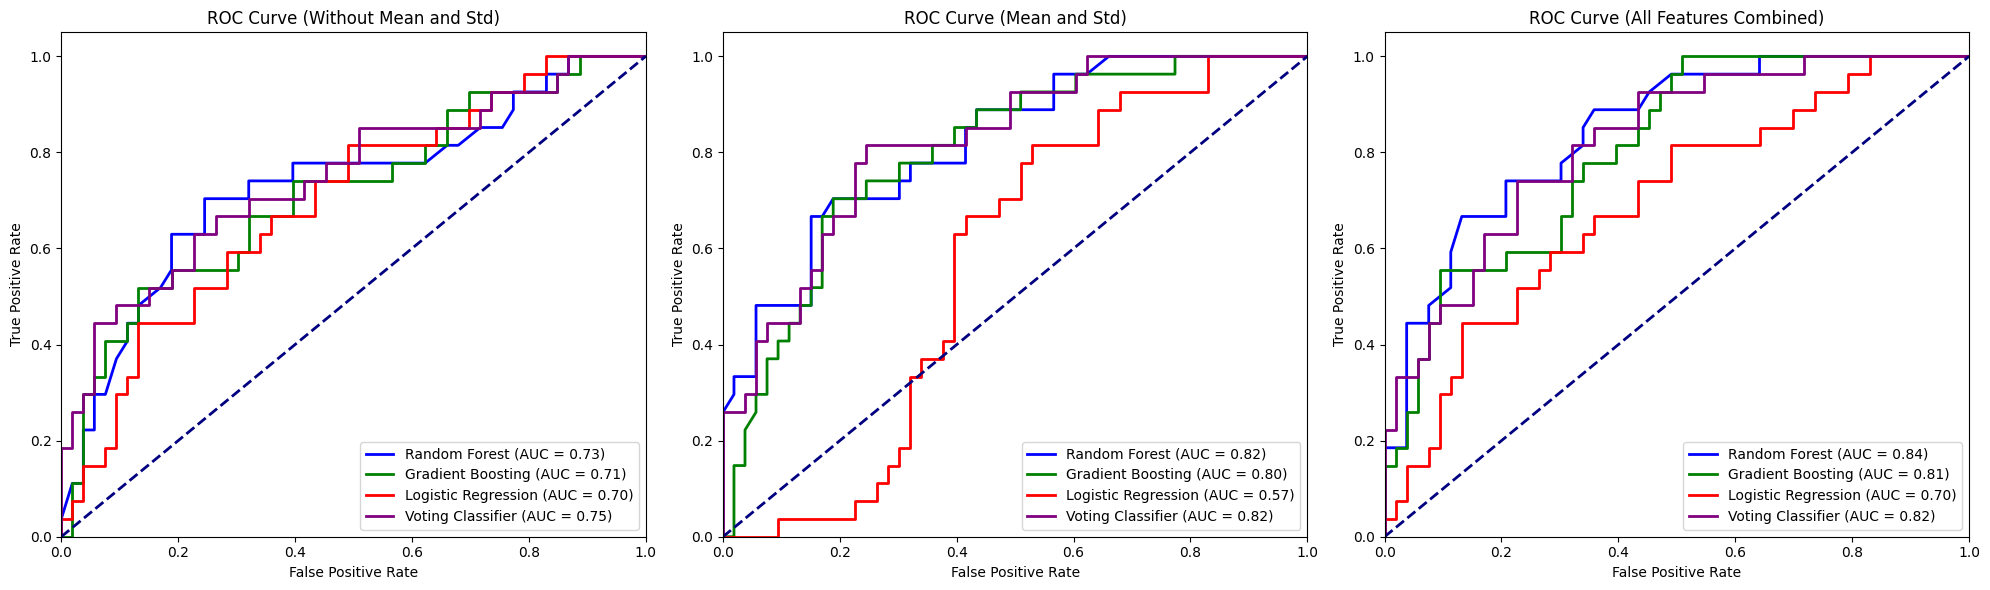

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is already loaded and cleaned

# First set of features (without mean and standard deviation)
features_1 = ['DTW_Ay_1', 'DTW_Ay_2', 'DTW_Ay_3', 'DTW_Ay_4', 'DTW_Ay_5',
              'DTW_GyroZ_1', 'DTW_GyroZ_2', 'DTW_GyroZ_3', 'DTW_GyroZ_4', 'DTW_GyroZ_5']

# Second set of features (only mean and standard deviation)
features_2 = ['Mean_Sequence_Ay', 'Mean_Sequence_GyroZ', 'Std_Sequence_Ay', 'Std_Sequence_GyroZ']

# Third set of features (all features combined)
features_3 = features_1 + features_2

# Define function to plot ROC curves for a given set of features
def plot_roc_curves(X, y, ax, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize classifiers
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    gb_clf = GradientBoostingClassifier(random_state=42)
    log_reg_clf = LogisticRegression(max_iter=1000, random_state=42)
    voting_clf = VotingClassifier(estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('log_reg', log_reg_clf)
    ], voting='soft')

    # Train classifiers
    rf_clf.fit(X_train, y_train)
    gb_clf.fit(X_train, y_train)
    log_reg_clf.fit(X_train, y_train)
    voting_clf.fit(X_train, y_train)

    # Predict probabilities
    y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
    y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
    y_prob_log_reg = log_reg_clf.predict_proba(X_test)[:, 1]
    y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]

    # Calculate ROC curves and AUC scores
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
    roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

    fpr_voting, tpr_voting, _ = roc_curve(y_test, y_prob_voting)
    roc_auc_voting = auc(fpr_voting, tpr_voting)

    # Plot ROC curves
    ax.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
    ax.plot(fpr_gb, tpr_gb, color='green', lw=2, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
    ax.plot(fpr_log_reg, tpr_log_reg, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
    ax.plot(fpr_voting, tpr_voting, color='purple', lw=2, label='Voting Classifier (AUC = %0.2f)' % roc_auc_voting)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot ROC curves for the first set of features
plot_roc_curves(df[features_1], df['Class'], axs[0], 'ROC Curve (Without Mean and Std)')

# Plot ROC curves for the second set of features
plot_roc_curves(df[features_2], df['Class'], axs[1], 'ROC Curve (Mean and Std)')

# Plot ROC curves for the third set of features
plot_roc_curves(df[features_3], df['Class'], axs[2], 'ROC Curve (All Features Combined)')

plt.tight_layout()
plt.show()


# feature importance

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        53
           1       0.62      0.67      0.64        27

    accuracy                           0.75        80
   macro avg       0.72      0.73      0.73        80
weighted avg       0.76      0.75      0.75        80



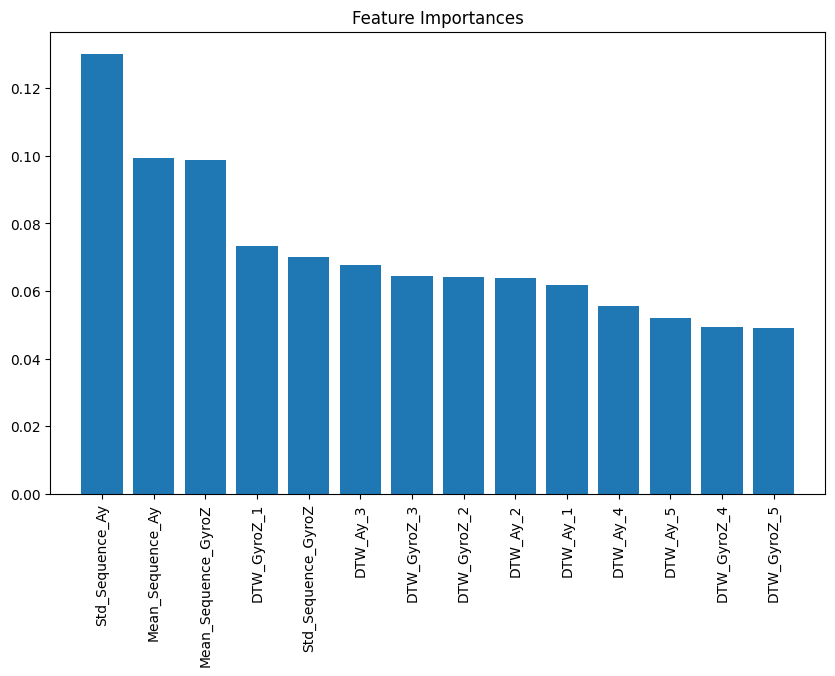

In [68]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the features and target variable
features = df[['Mean_Sequence_Ay', 'Mean_Sequence_GyroZ', 'Std_Sequence_Ay', 'Std_Sequence_GyroZ'] + [f'DTW_Ay_{i+1}' for i in range(5)] + [f'DTW_GyroZ_{i+1}' for i in range(5)]]
target = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optionally, feature importance can be visualized
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Finding optimal threshold

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import numpy as np

# Example DataFrame
df=df

# Features and target
features = ['DTW_Ay_1', 'DTW_Ay_2', 'DTW_Ay_3',
    'DTW_Ay_4', 'DTW_Ay_5', 'DTW_GyroZ_1',
    'DTW_GyroZ_2', 'DTW_GyroZ_3', 'DTW_GyroZ_4',
    'DTW_GyroZ_5']
X = df[features]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
log_reg_clf = LogisticRegression(max_iter=1000, random_state=42)

# Fit models
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
log_reg_clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [64]:
from sklearn.metrics import classification_report

def find_optimal_thresholds(classifier, X_test, y_test, feature_names):
    thresholds = {}

    # Predict probabilities for each feature
    for feature in feature_names:
        y_prob = classifier.predict_proba(X_test[features])[:, 1]
        fpr, tpr, thresh = roc_curve(y_test, y_prob)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresh[optimal_idx]
        thresholds[feature] = optimal_threshold

    return thresholds

# Find optimal thresholds for each classifier
rf_thresholds = find_optimal_thresholds(rf_clf, X_test, y_test, features)
gb_thresholds = find_optimal_thresholds(gb_clf, X_test, y_test, features)
log_reg_thresholds = find_optimal_thresholds(log_reg_clf, X_test, y_test, features)

print("Optimal thresholds for Random Forest:\n", rf_thresholds)
print("\nOptimal thresholds for Gradient Boosting:\n", gb_thresholds)
print("\nOptimal thresholds for Logistic Regression\n:", log_reg_thresholds)


Optimal thresholds for Random Forest:
 {'DTW_Ay_1': 0.44, 'DTW_Ay_2': 0.44, 'DTW_Ay_3': 0.44, 'DTW_Ay_4': 0.44, 'DTW_Ay_5': 0.44, 'DTW_GyroZ_1': 0.44, 'DTW_GyroZ_2': 0.44, 'DTW_GyroZ_3': 0.44, 'DTW_GyroZ_4': 0.44, 'DTW_GyroZ_5': 0.44}

Optimal thresholds for Gradient Boosting:
 {'DTW_Ay_1': 0.650376464440881, 'DTW_Ay_2': 0.650376464440881, 'DTW_Ay_3': 0.650376464440881, 'DTW_Ay_4': 0.650376464440881, 'DTW_Ay_5': 0.650376464440881, 'DTW_GyroZ_1': 0.650376464440881, 'DTW_GyroZ_2': 0.650376464440881, 'DTW_GyroZ_3': 0.650376464440881, 'DTW_GyroZ_4': 0.650376464440881, 'DTW_GyroZ_5': 0.650376464440881}

Optimal thresholds for Logistic Regression
: {'DTW_Ay_1': 0.41456715256129745, 'DTW_Ay_2': 0.41456715256129745, 'DTW_Ay_3': 0.41456715256129745, 'DTW_Ay_4': 0.41456715256129745, 'DTW_Ay_5': 0.41456715256129745, 'DTW_GyroZ_1': 0.41456715256129745, 'DTW_GyroZ_2': 0.41456715256129745, 'DTW_GyroZ_3': 0.41456715256129745, 'DTW_GyroZ_4': 0.41456715256129745, 'DTW_GyroZ_5': 0.41456715256129745}
